# Sample Information Statistics (Figure1) (source /Data filter/filter.R)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


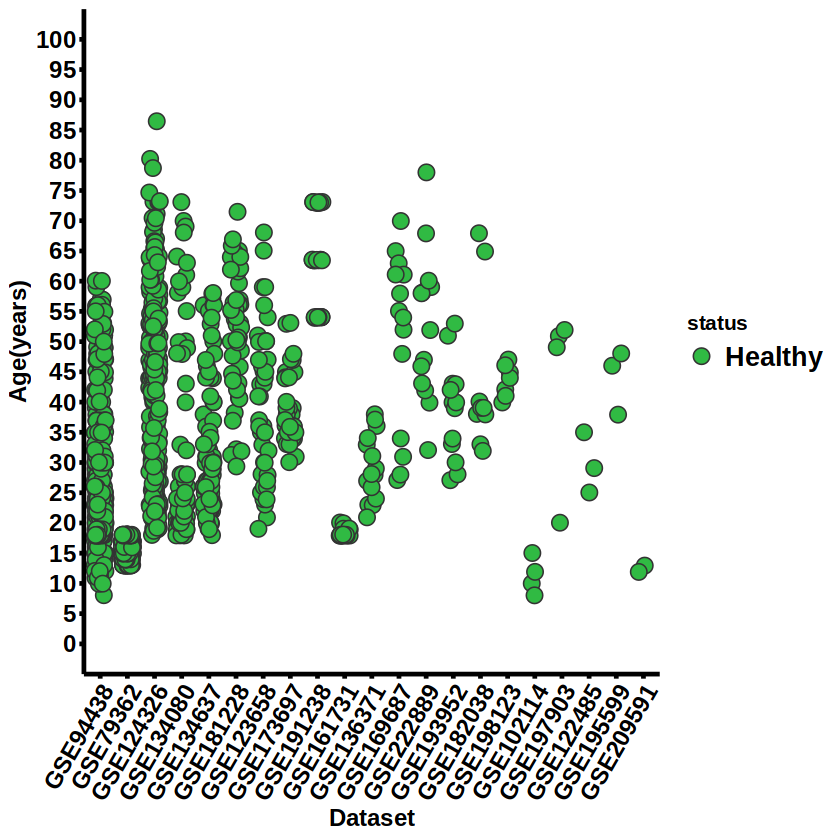

In [6]:
rm(list = ls())

setwd("/data3/lishuhan/30GSE_health_SRR/v3AS")
d<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/SRR_info/health.csv")
##Age distribution map
library(ggplot2)
freq <- table(d$dataset)

levels <- names(freq)[order(freq, decreasing = TRUE)]

d$dataset <- factor(d$dataset, levels = levels)
d$Age <- as.numeric(as.character(d$Age ))

color_vector <- c("Healthy" = "#30ba43")
g=ggplot(data = d,aes(x = dataset, y = Age , fill = status))+
  geom_point(aes(fill=status),size=4,shape=21,color ="grey20",
             position = position_jitter(width=0.2,height=0.1))+
  #geom_jitter(mapping = aes(x = dataset, y = Age, color = status), width = 0.2) +
  scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, by = 5)) +
  scale_fill_manual(values = color_vector) +   # 使用自定义的颜色向量
  xlab("Dataset") +
  ylab("Age(years)")+
  # labs(colour = "Status")+
  theme_minimal() +
  theme(
    panel.background = element_blank(),  # 移除背景
    panel.grid.major = element_blank(),  # 移除主要网格线
    panel.grid.minor = element_blank(),  # 移除次要网格线
    axis.line = element_line(color = "black"),  # 添加坐标轴
    axis.text.x = element_text(angle = 60, hjust = 1,face = "bold",color = "black"),
    axis.text.y = element_text(angle = 0, hjust = 1,face = "bold",color = "black")
  )+
  theme(panel.grid = element_blank(), panel.border = element_blank(),
        axis.line = element_line(size = 1, colour = 'black'),
        axis.ticks = element_line(size = 1, colour = 'black'))+
  theme(
    #panel.border = element_rect(colour = "black", fill=NA, size=1.5),  # 边框线加粗
    panel.grid.major = element_blank(),  # 大网格消失
    panel.grid.minor = element_blank(),  # 小网格消失
    text = element_text(size=12, face="bold"),  # 所有文本加大加粗
    plot.title = element_text(size=16, face="bold"),  # 标题加大加粗
    legend.text = element_text(size=16, face="bold"),  # 图例文字加大加粗
    axis.title = element_text(size=14, face="bold"),  # x轴和y轴标题文字加大加粗
    axis.text = element_text(size=14, face="bold")  # 刻度字体加大加粗
  )
g


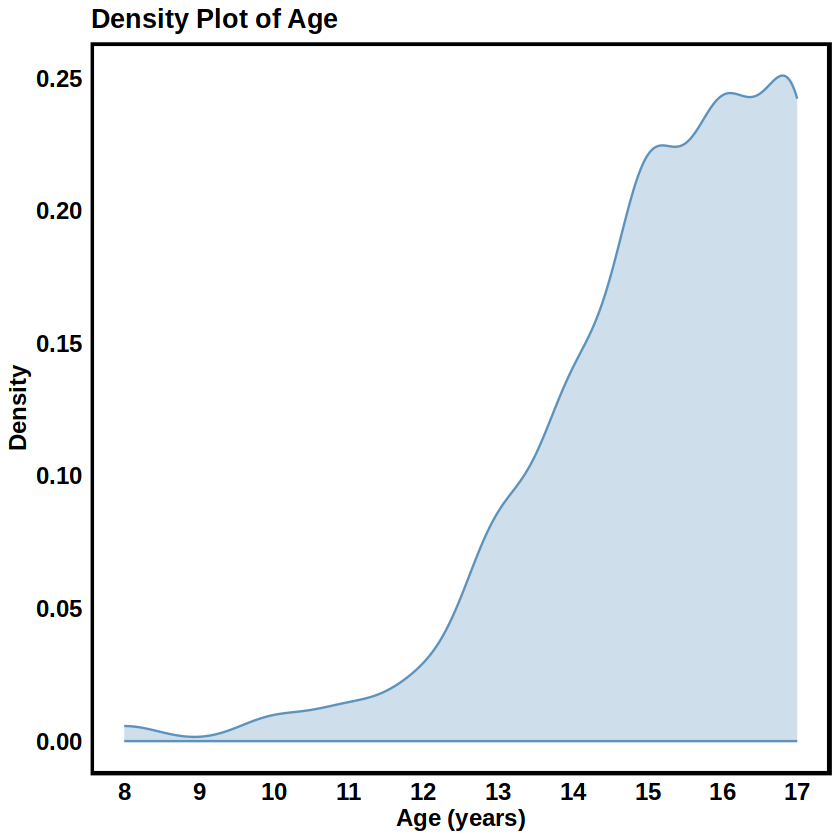

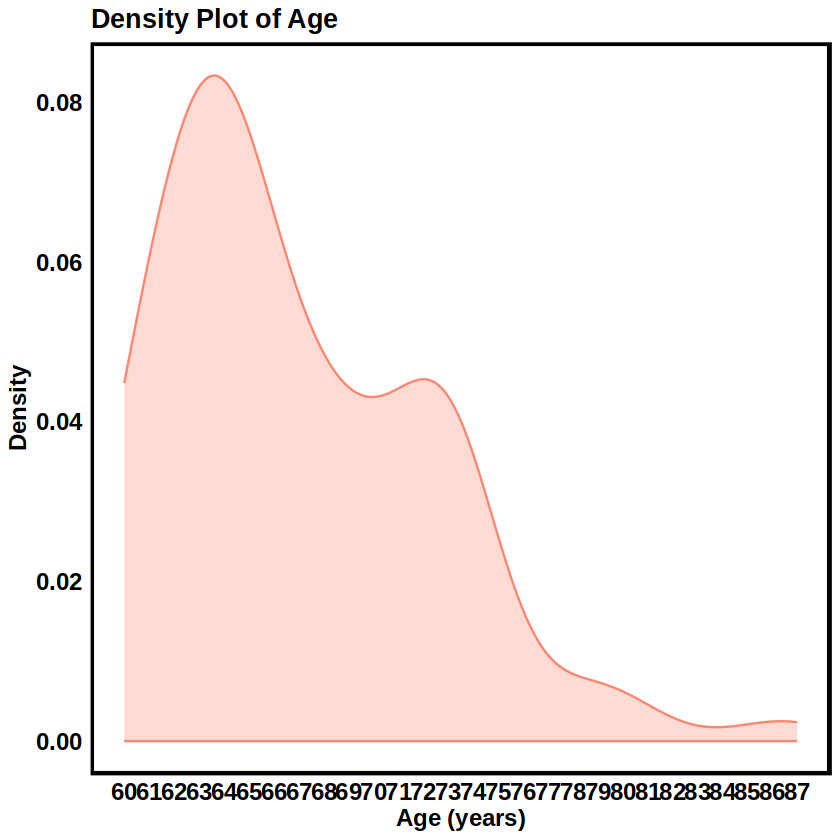

In [8]:
a<-read.csv("/data3/lishuhan/30GSE_health_SRR/v2AS/v2SRR/df_0_17.csv")
c<-read.csv("/data3/lishuhan/30GSE_health_SRR/v2AS/v2SRR/df_60_100.csv")
p<-ggplot(a, aes(x = Age)) + 
  stat_density(geom = "area", alpha = 0.3, color = "#5c93bd",fill="#5c93bd") +  # 使用线图几何对象绘制密度估计
  scale_x_continuous(limits = c(8, 17), breaks = seq(8, 17, by = 1)) +  # 设置x轴的范围和刻度
  labs(x = "Age (years)", y = "Density", title = "Density Plot of Age") +  # 添加标签
  theme_minimal() +
  theme(
    panel.border = element_rect(colour = "black", fill=NA, size=1.5),  # 边框线加粗
    panel.grid.major = element_blank(),  # 大网格消失
    panel.grid.minor = element_blank(),  # 小网格消失
    text = element_text(size=12, face="bold"),  # 所有文本加大加粗
    plot.title = element_text(size=16, face="bold"),  # 标题加大加粗
    legend.text = element_text(size=14, face="bold"),  # 图例文字加大加粗
    axis.title = element_text(size=14, face="bold",colour = "black"),  # x轴和y轴标题文字加大加粗
    axis.text = element_text(size=14, face="bold",colour = "black")  # 刻度字体加大加粗
  )

p2<-ggplot(c, aes(x = Age)) + 
  stat_density(geom = "area", alpha = 0.3, fill="#ff8670",color = "#ff8670") +  # 使用线图几何对象绘制密度估计
  scale_x_continuous(limits = c(60, 87), breaks = seq(60, 87, by = 1)) +  # 设置x轴的范围和刻度
  labs(x = "Age (years)", y = "Density", title = "Density Plot of Age") +  # 添加标签
  theme_minimal() +
  theme(
    panel.border = element_rect(colour = "black", fill=NA, size=1.5),  # 边框线加粗
    panel.grid.major = element_blank(),  # 大网格消失
    panel.grid.minor = element_blank(),  # 小网格消失
    text = element_text(size=12, face="bold"),  # 所有文本加大加粗
    plot.title = element_text(size=16, face="bold"),  # 标题加大加粗
    legend.text = element_text(size=14, face="bold"),  # 图例文字加大加粗
    axis.title = element_text(size=14, face="bold",colour = "black"),  # x轴和y轴标题文字加大加粗
    axis.text = element_text(size=14, face="bold",colour = "black")  # 刻度字体加大加粗
  )

p
p2


# Differential gene expression between young and old groups and its association with immunosenescence. (Figure2) 
# (source /DiffExpr_YoungVsOld/DiffExpr_YoungVsOld.R)

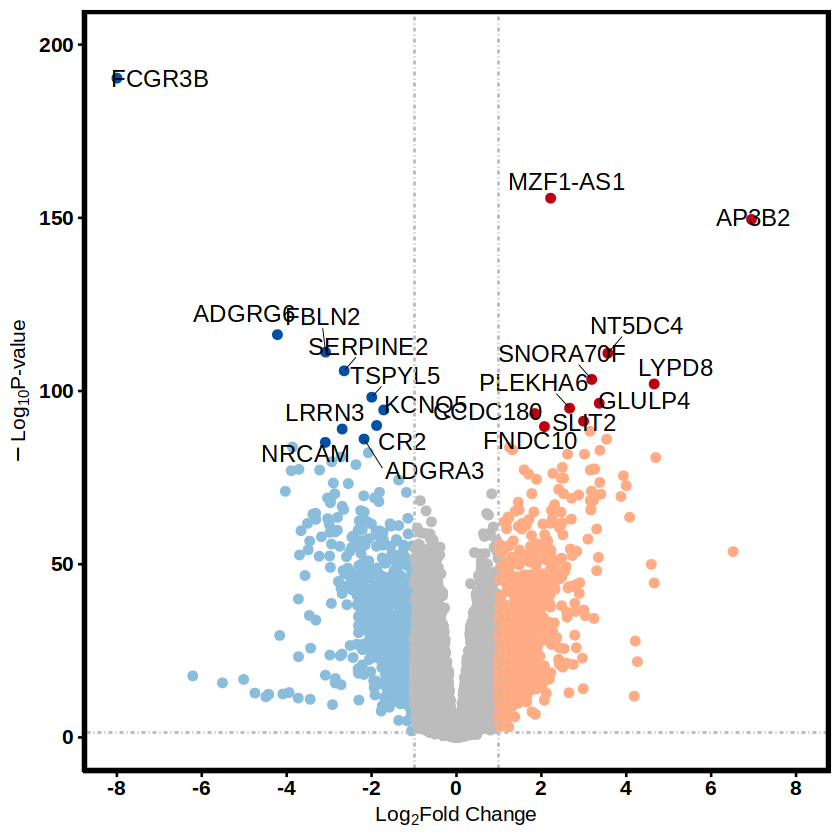

In [18]:
rm(list = ls())
library(dplyr)
library(ggpubr)
TRD_fit<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/y_old_DEG.csv",row.names = 1)
TRD_fit$gene <- rownames(TRD_fit)
df<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/y_old_DEG.csv",row.names = 1)
df$gene <- rownames(TRD_fit)
# 读入展示基因名的文件 并在差异基因文件里标记
gene <- read.delim("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/top20gene.txt"
                   ,sep="\t",header = T,quote = "",fill=TRUE)$gene
df$label=""
df$label[match(gene,df$gene)] <- gene 
#write.table(df,"result.txt",sep='\t',row.names=F,quote=F) #按照差异阈值标记出上下调的表输出、保存，方便查看

# 设置颜色并排序
df$color <- ifelse(df$threshold == "Not" & df$label == "", "#bcbcbc",   #color1这类基因是：非差异基因，不标记基因名
                   ifelse(df$threshold == "Up" & df$label == "", "#ffab84",   #color2这类基因是：上调的差异基因，不标记基因名
                          ifelse(df$threshold == "Down" & df$label == "", "#8abddc",  #color3这类基因是：下调的差异基因，不标记基因名 
                                 ifelse(df$threshold == "Up" & df$label != "", "#be0001", "#0051a6"))))  #color4这类基因是:图里标记基因名的上调差异基因  color5这类基因是:非上述几类的，也就是图里标记基因名的下调差异基因

# 绘图
df <- df %>% arrange(color)
df$color <- factor(df$color, levels = c("#bcbcbc", "#ffab84", "#8abddc", "#be0001", "#0051a6"))

df$logP<- -log10(df$P.Value)
p <- ggscatter(df,
               x="logFC",  #轴数据对应的列名
               y="logP",  #y轴数据对应的列名
               color = "color",  #点颜色对应的列名
               palette = c("#bcbcbc","#ffab84","#8abddc","#be000e","#0051a6"),  #color1-5分别对应的颜色
               label = df$label,   #标记的基因名
               font.label = c(15,"plain","black"),  #设置基因名的字体大小，是普通还是加粗，字体颜色
               repel = T ) +   #标记的基因名别重叠了
  labs( 
    x=expression(paste(Log[2], 'Fold Change'),color="black", size=12,face = "bold"),   #设置x轴标题 这里用expression实现下标
    y=expression(paste(-Log[10], 'P-value'),color="black", size=12,face = "bold"))+
  geom_vline(xintercept=c(-1,1),lty=4,col="#bcbcbc",lwd=0.6)+
  geom_hline(yintercept = -log10(0.05),lty=4,col="#bcbcbc",lwd=0.6)+
  theme(legend.position="none",
        panel.grid=element_blank(),
        legend.title = element_blank(),
        legend.text= element_text(color="black", size=18,face = "bold"),
        plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(color="black", size=12,face = "bold"),
        axis.text.y = element_text(color="black", size=12,face = "bold"),
        axis.title.x = element_text(color="black", size=12,face = "bold"),
        axis.title.y = element_text(color="black", size=12,face = "bold"),
        panel.border = element_rect(colour = "black", fill = NA, size = 2))+
  scale_y_continuous(limits = c(0, 200), breaks = seq(0, 200, by = 50))+
  scale_x_continuous(limits = c(-8, 8), breaks = seq(-8, 8, by = 2))

print(p)


Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.3.2”
Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))
! pheatmap() has been masked by ComplexHeatmap::pheatmap(). Most of the arguments
   in the original pheatmap() are identically supported in the new function. You 
   can still use the original fu


GSE102114 GSE123658 GSE124326 GSE134080 GSE169687 GSE181228 GSE182038 GSE191238 
        4         2        32         8         5        10         2        16 
GSE209591 GSE222889  GSE79362  GSE94438 
        2         3       222        65 

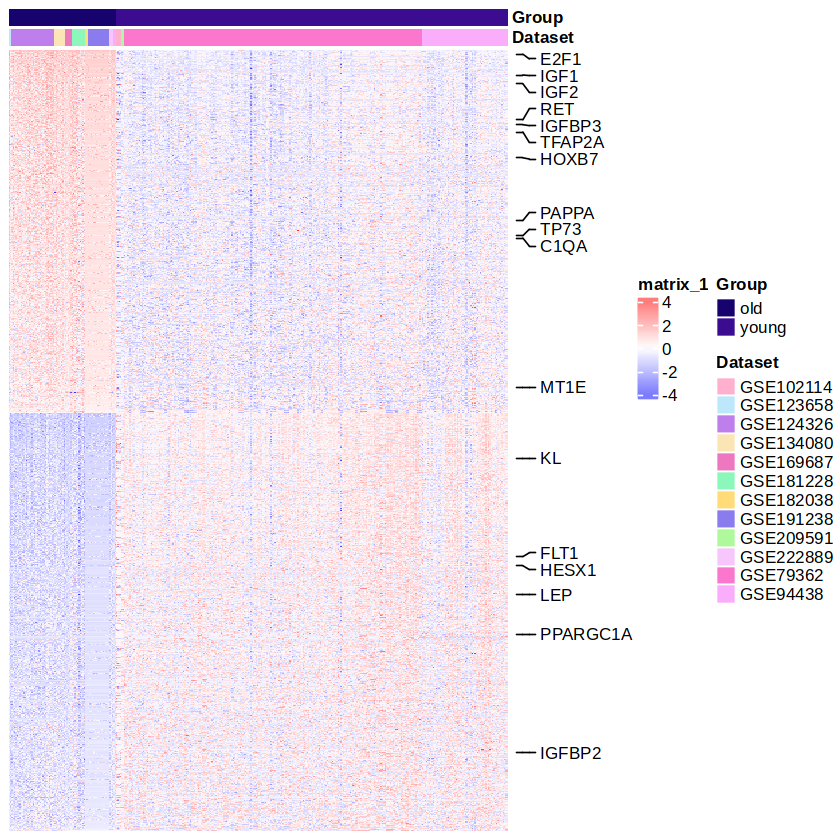

In [20]:
rm(list=ls())
library(pheatmap)
DEG<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/y_old_DEG.csv",row.names = 1)
DEG_up<-DEG[DEG$threshold=="Up",]
DEG_down<-DEG[DEG$threshold=="Down",]
up<-DEG_up[order(DEG_up$P.Value,decreasing = FALSE),][1:10,]
down<-DEG_down[order(DEG_down$P.Value,decreasing = FALSE),][1:10,]
all<-rbind(DEG_up,DEG_down)
#矩阵
data <- read.delim("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/rB_Expr.tab", header = TRUE, sep = "\t")
#分组信息
c<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/metadata.csv",row.names = 1)
table(c$dataset)[order(names(table(c$dataset)))]
meta1<-c[order(c$dataset),]

meta1 <- meta1 %>%
  mutate(type = ifelse(Age >= 60, "old", "young"))
meta1<-meta1[,c(5,6)]
colnames(meta1)[2]<-"Group"
colnames(meta1)[1]<-"Dataset"

ann_color = list(group = c(young="#7293cb", old="#ed7c68"))
ann_color <- list(
  type = c("young"="#7293cb", "old"="#ed7c68"),
  dataset = c("GSE102114" = "#f6a889", "GSE123658" = "#fddb83","GSE124326" = "#db8b8f",
              "GSE134080" = "#fad2b6","GSE169687" = "#f2afa4","GSE181228" = "#fcd39b",
              "GSE182038" = "#f4d7c1","GSE191238" = "#f5b6b5","GSE209591" = "#f9c7a7",
              "GSE222889" = "#b4d0f7","GSE79362" = "#81a4eb","GSE94438" = "#afced7")
)


meta2<-meta1[order(meta1$Group),]
data2<-data[all$gene,rownames(meta2)]

phea<-pheatmap(as.matrix(data2),
               annotation_col=meta2,
               border_color = NA,
               color = colorRampPalette(c("blue","white","red"))(30),
               cluster_cols = F,#行聚类
               cluster_rows = F,#列聚类
               show_rownames = F,
               show_colnames = F,#c("c1","c2","c3","z1","z2","z3"),  #显示行名和列名
               scale = "row", ## none, row, column
               fontsize = 12,
               fontsize_row = 12,
               fontsize_col = 10,
               annotation_legend=TRUE,
               annotation_colors = ann_color,
               border = FALSE,
               use_raster=F)
phea


genes <- data.frame(genes=c("E2F1","IGF1","IGF2","RET","IGFBP3",
                            "TFAP2A","HOXB7","PAPPA","TP73" ,
                            "C1QA","MT1E","KL","FLT1","HESX1","LEP","PPARGC1A","IGFBP2"))
location<-which(rownames(data2) %in% genes$genes)
gene<-genes$genes[genes$genes %in% rownames(data2)]

phea+rowAnnotation(link = anno_mark(at = location, 
                                    labels = gene, labels_gp = gpar(fontsize = 10)))



p1<-phea+rowAnnotation(link = anno_mark(at = location, 
                                        labels = gene, labels_gp = gpar(fontsize = 10)))
p1


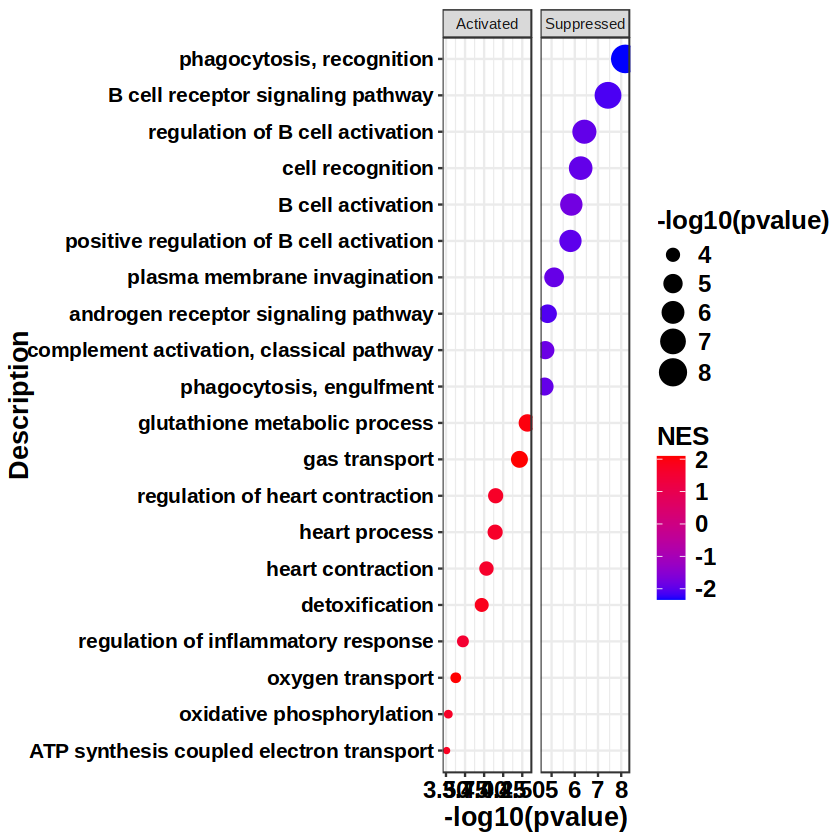

In [21]:
rm(list=ls())
load("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/GSEA/GSEA_result.RData")
all<-GO_kk_entrez@result
bp<-all[all$ONTOLOGY=="BP",]

bp$log10Pvalue <- -log10(bp$pvalue)
up <- bp[bp$NES > 0, ]
down <- bp[bp$NES < 0, ]

up_sorted <- up[order(-up$log10Pvalue), ]
down_sorted <- down[order(-down$log10Pvalue), ]


top10up<-up_sorted[1:10,]
top10down<-down_sorted[1:10,]
top10up$type<-"Activated"
top10down$type<-"Suppressed"

data<-rbind(top10up,top10down)

data <- data %>%
  arrange(log10Pvalue) %>%
  mutate(Description = factor(Description, levels = unique(Description)))

# 创建气泡图
p <- ggplot(data, aes(x = Description, y = log10Pvalue, size = log10Pvalue, color = NES)) +
  geom_point(alpha = 1) +
  scale_color_gradient(low = "blue", high = "red") +  # 定义颜色渐变
  scale_size_continuous(range = c(1, 7)) +  # 定义气泡大小
  facet_grid(. ~ type, scales = "free", space = "fixed") +  # 分面设置
  coord_flip() +  # 翻转坐标轴
  theme_bw() +  # 使用黑白主题
  theme(    # 自定义主题设置
    plot.title = element_text(hjust = 0.5, color = "black", face = "bold"),
    strip.text.y = element_text(size = 20, color = "black", face = "bold"),  # 加大加粗分面标题
    legend.position = "right",
    legend.title = element_text(size = 15, color = "black", face = "bold"),
    legend.text = element_text(size = 14, color = "black", face = "bold"),
    axis.text.x = element_text(size = 14, color = "black", face = "bold"),
    axis.text.y = element_text(size = 12,  color = "black", face = "bold"),
    axis.title.x = element_text(size = 16, color = "black", face = "bold"),
    axis.title.y = element_text(size = 16, color = "black", face = "bold")
  ) +  
  labs(x = "Description", y = "-log10(pvalue)", size = "-log10(pvalue)", color = "NES")  # 定义轴标题和图例标题

p

Warning message:
“package ‘eulerr’ was built under R version 4.3.2”


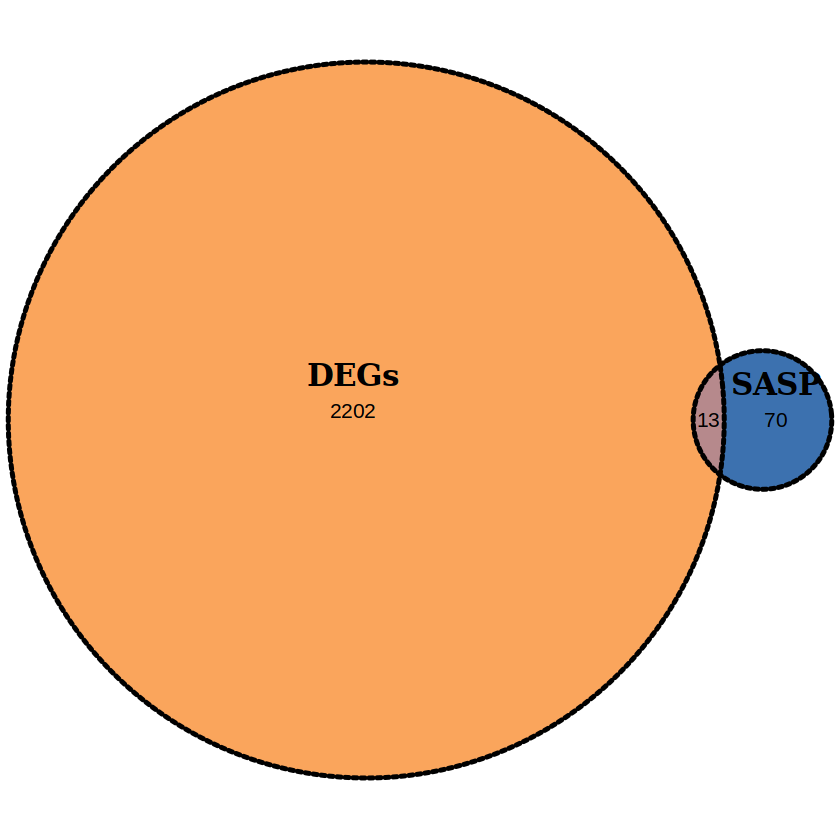

In [23]:
rm(list=ls())
library(eulerr)
DEG<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/y_old_DEG.csv",row.names = 1)
DEG1<-subset(DEG,DEG$threshold %in% c("Up","Down"))
SASP<- read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/SASP/SASP_SenMayo.csv",sep = "\t")
SASP<-subset(SASP,SASP$Annotation=="SASP")
my_list <- list(DEG1$gene, SASP$Symbol)
my_list[[2]] <- unique(my_list[[2]])
names(my_list) <- c("DEGs", "SASP")

# 创建euler对象，计算两个list的交集
fit <- euler(my_list, shape = "circle")

# 绘图
plot(
  fit,
  #fills = list(fill = c("#4986b5", "#34bf49"), alpha = 0.6),
  fills = list(fill = c("#F98F34", "#0C4E9B"), alpha = 0.8),
  labels = list(col = "black", font = 2, fontfamily = "serif", cex = 1.5),
  edges = list(col = "black", lwd = 3, lty = 2),  # lty = 2 表示虚线
  quantities = list(type = "counts", cex = 1)  # 只显示 counts，不显示 percent
) -> p2

p2


# The pattern of alternative splicing (AS) during the aging process. (Figure 3)
# (source /AS_YoungVsOld/AS_YoungVsOld.R)

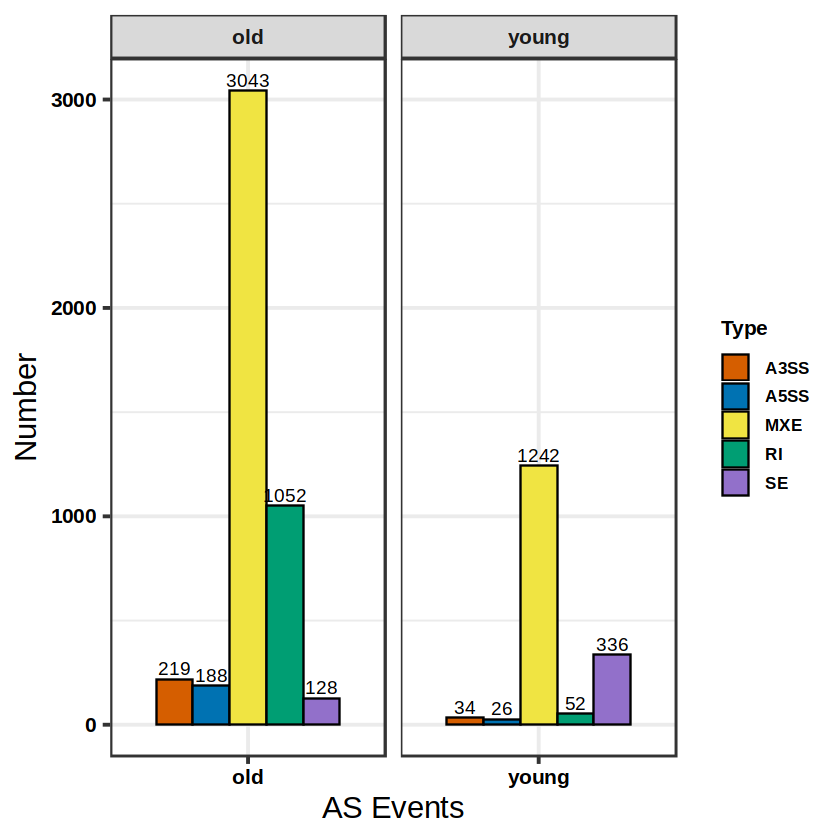

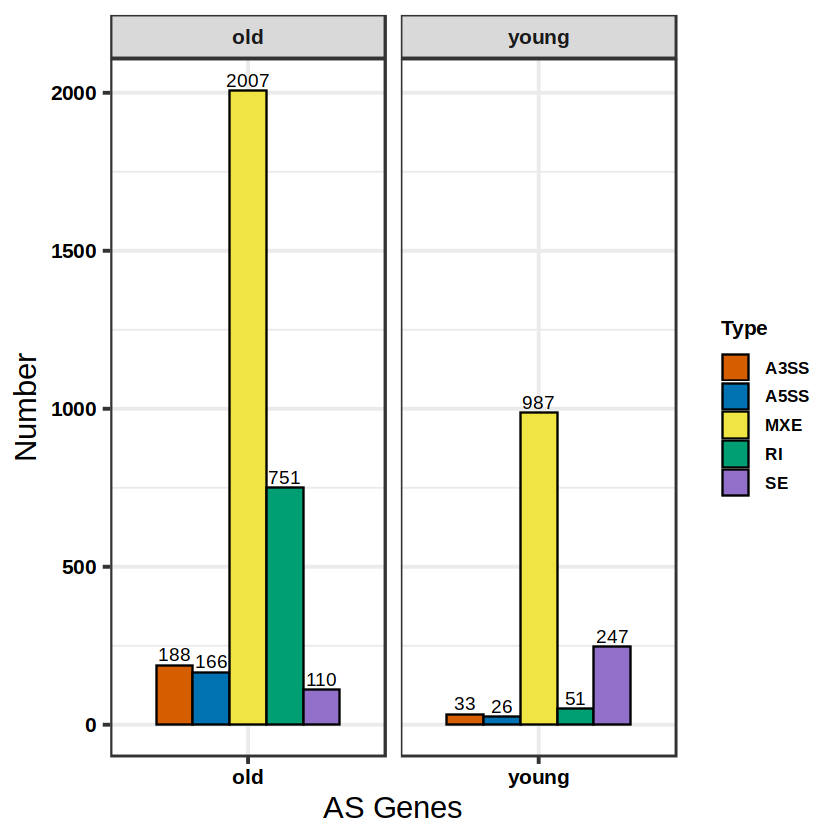

In [5]:
rm(list=ls())
library(dplyr)
library(reshape2)
library(ggplot2)
RI<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/RI_vol.csv")
SE<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/SE_vol.csv")
MXE<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/MXE_vol.csv")
A3SS<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/A3SS_vol.csv")
A5SS<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/A5SS_vol.csv")
# 为每个数据框添加 'AS_type' 列
SE$AS_type <- "SE"
RI$AS_type <- "RI"
MXE$AS_type <- "MXE"
A3SS$AS_type <- "A3SS"
A5SS$AS_type <- "A5SS"

# 合并这五个数据框
df_combined <- bind_rows(SE, RI, MXE, A3SS, A5SS)

# 添加 'differ' 列
df_combined$differ <- ifelse(df_combined$status == "old", 1, 0)

df_combined<-subset(df_combined,df_combined$status %in% c("old","young"))
df<-melt(table(df_combined$status,df_combined$AS_type))
# df1<-df[order(df$Var1,df$value),]
# 
# df1$group<-paste0(df1$Var1,1:5)
# df1$type_order=factor(rev(as.integer(1:dim(df1)[1])),labels =rev(df1$group))

p <- ggplot(df, aes(x = Var1, y = value, fill = Var2)) +
  #geom_bar(position = "do") +
  facet_wrap(~ Var1, ncol = 2, scales = "free_x") +
  geom_bar(stat = 'identity', position = 'dodge',
           width = 0.8, color = 'black') +
  geom_text(aes(label = value), size = 4,
            position = position_dodge(width = 0.8),
            vjust = -0.3) +
  labs(x = NULL) +
  theme_bw(base_size = 18) +
  theme(
    axis.text.x = element_text(colour = 'black', size = 12, face = "bold"),  # X轴文本
    axis.text.y = element_text(colour = 'black', size = 12, face = "bold"),  # Y轴文本
    strip.text = element_text(face = "bold", size = 12),  # 分面标题
    legend.title = element_text(face = "bold", size = 12),  # 图例标题
    legend.text = element_text(face = "bold", size = 10),  # 图例文本
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5)  # 图形标题
  ) +
  scale_fill_manual(values = rep(c('#D55E00', '#0072B2', '#F0E442',
                                   '#009E73', '#9270ca', '#CC79A7'), 3)) +
  labs(fill = "Type", y = "Number", x = "AS Events")

p
##gene
data<-melt(table(df_combined$status,df_combined$AS_type))
data$ga<-paste0(data$Var1,data$Var2)
df_combined$ga<-paste0(df_combined$status,df_combined$AS_type,df_combined$geneSymbol)
df_combined1<-df_combined[!duplicated(df_combined$ga),]#这里就保证了是要符合status AS gene三种情况相同，就可以做出没有重复得
data<-melt(table(df_combined1$status,df_combined1$AS_type))

p1<-ggplot(data,aes(x=Var1,y=value,fill=Var2))+
  #geom_bar(position = "do") +
  facet_wrap(~Var1, ncol = 2, scales = "free_x") + 
  geom_bar(stat = 'identity', position = 'dodge', 
           width = 0.8,color='black')+        
  geom_text(aes(label=value),size=4,
            position = position_dodge(width = 0.8), 
            vjust=-0.3)+ 
  labs(x=NULL)+ 
  theme_bw(base_size = 18)+
  theme(
    axis.text.x = element_text(colour = 'black', size = 12, face = "bold"),  # X轴文本
    axis.text.y = element_text(colour = 'black', size = 12, face = "bold"),  # Y轴文本
    strip.text = element_text(face = "bold", size = 12),  # 分面标题
    legend.title = element_text(face = "bold", size = 12),  # 图例标题
    legend.text = element_text(face = "bold", size = 10),  # 图例文本
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5)  # 图形标题
  ) +
  scale_fill_manual(values = rep(c('#D55E00','#0072B2','#F0E442',
                                   '#009E73','#9270ca','#CC79A7'),3))+
  labs(fill="Type",y="Number",x="AS Genes")


p1

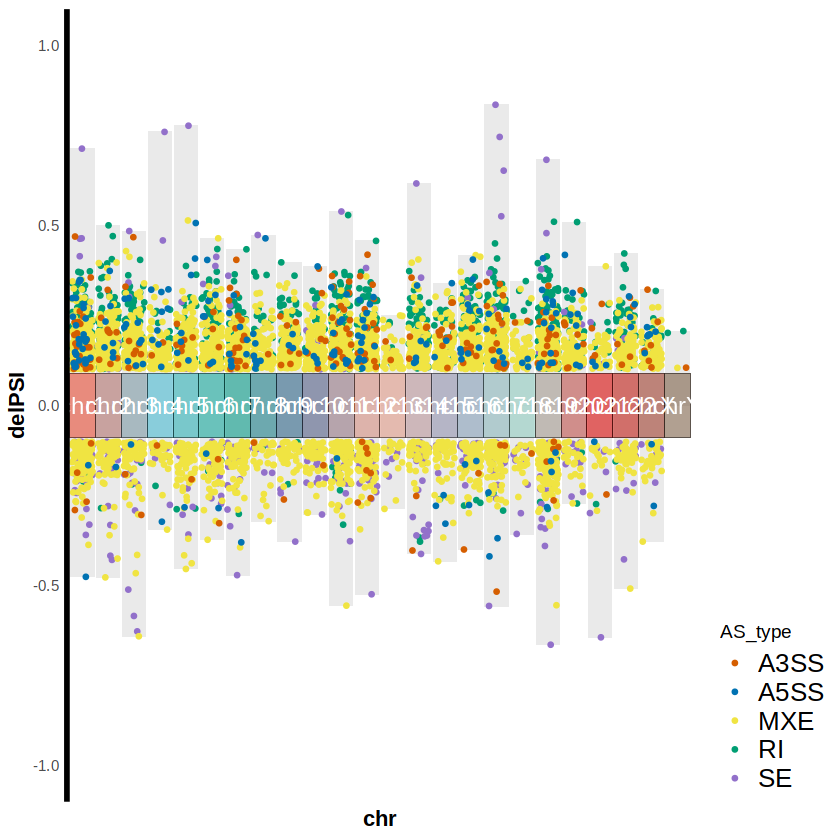

In [7]:
rm(list=ls())
chr_size = read.table("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/DEG/hg38.chrom.sizes.txt",sep = '\t',header = F,row.names = 1)
chr_size$chr = rownames(chr_size)
colnames(chr_size)[1]='Total_length_bp'
df<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/ALL_AS_chr.csv",row.names = 1)
library(ggrepel)
chr_levels <- paste0("chr", c(1:22, "X", "Y"))
df$chr <- factor(df$chr, levels = chr_levels)
p <- ggplot()+
  geom_jitter(data = df,
              aes(x = chr, y = deltaPSI),
              size = 0.85,
              width =0.4)

#根据图p中delPSI区间确定背景柱长度：
# 根据deltaPSI值分组
df_positive <- df %>% dplyr::filter(deltaPSI > 0)
df_negative <- df %>% dplyr::filter(deltaPSI < 0)

# 找到每个chr上最大的deltaPSI值
max_deltaPSI_per_chr <- df_positive %>%
  group_by(chr) %>%
  summarise(max_deltaPSI = max(deltaPSI))

# 找到每个chr上最小的deltaPSI值
min_deltaPSI_per_chr <- df_negative %>%
  group_by(chr) %>%
  summarise(min_deltaPSI = min(deltaPSI))

# 将chr转换为数字，按顺序排列
chr_levels <- sort(unique(c(df_positive$chr, df_negative$chr)))
chr_to_num <- setNames(seq_along(chr_levels), chr_levels)

max_deltaPSI_per_chr <- max_deltaPSI_per_chr %>%
  mutate(x = chr_to_num[chr]) %>%
  arrange(x)

min_deltaPSI_per_chr <- min_deltaPSI_per_chr %>%
  mutate(x = chr_to_num[chr]) %>%
  arrange(x)

# 创建新的数据框
dfbar <- data.frame(
  x = max_deltaPSI_per_chr$x,
  y = max_deltaPSI_per_chr$max_deltaPSI
)
dfbar$x<-rownames(dfbar)
dfbar1 <- data.frame(
  x = min_deltaPSI_per_chr$x,
  y = min_deltaPSI_per_chr$min_deltaPSI
)
dfbar1$x<-rownames(dfbar1)
#绘制背景柱：
p1 <- ggplot()+
  geom_col(data = dfbar,
           mapping = aes(x = x,y = y),
           fill = "#dcdcdc",alpha = 0.6)+
  geom_col(data = dfbar1,
           mapping = aes(x = x,y = y),
           fill = "#dcdcdc",alpha = 0.6)


#把散点火山图叠加到背景柱上：
color_vector <- c("A3SS" = "#D55E00", "A5SS" = "#0072b2", "MXE" = "#F0E442", "RI" = "#009E73", "SE" = "#9270ca")  # 示例颜色

p2 <- ggplot() +
  geom_col(data = dfbar,
           mapping = aes(x = x, y = y),
           fill = "#dcdcdc", alpha = 0.6) +
  geom_col(data = dfbar1,
           mapping = aes(x = x, y = y),
           fill = "#dcdcdc", alpha = 0.6) +
  geom_jitter(data = df,
              aes(x = factor(chr, levels = paste0("chr", c(1:22, "X", "Y"))), y = deltaPSI, color = AS_type),
              size = 0.85, width = 0.4) +
  scale_color_manual(values = color_vector) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1)
  )

#添加X轴的色块标签：
dfcol <- data.frame(
  x = as.numeric(chr_levels),
  y = 0,
  label = levels(chr_levels)
)

# 根据 log_length 生成颜色渐变
mycol <- colorRampPalette(c("#E64B35", "#4DBBD5", "#00A087", 
                            "#3C5488", "#F39B7F", "#8491B4", "#91D1C2", "#DC0000", "#7E6148"))(length(dfcol$label))

p3 <- p2 + geom_tile(data = dfcol,
                     aes(x=x,y=y),
                     height=0.18,
                     color = "black",
                     fill = mycol,
                     alpha = 0.6,
                     show.legend = F)

#添加数字
p6 <- p3+
  labs(x="chr",y="delPSI")+
  geom_text(data=dfcol,
            aes(x=x,y=y,label=label),
            size =5,
            color ="white")

p7 <- p6+
  theme_minimal()+
  theme(
    axis.title = element_text(size = 13,
                              color = "black",
                              face = "bold"),
    axis.line.y = element_line(color = "black",
                               size = 1.2),
    axis.line.x = element_blank(),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    legend.position = "right",
    legend.direction = "vertical",
    legend.justification = c(1,0),
    legend.text = element_text(size = 15)
  )+
  scale_y_continuous(limits = c(-1, 1), breaks = seq(-1, 1, by = 0.5))
p7

# Regulation of alternative splicing (AS) by splicing factors.(Figure 4)
# (source /AS_YoungVsOld/AS_YoungVsOld.R )

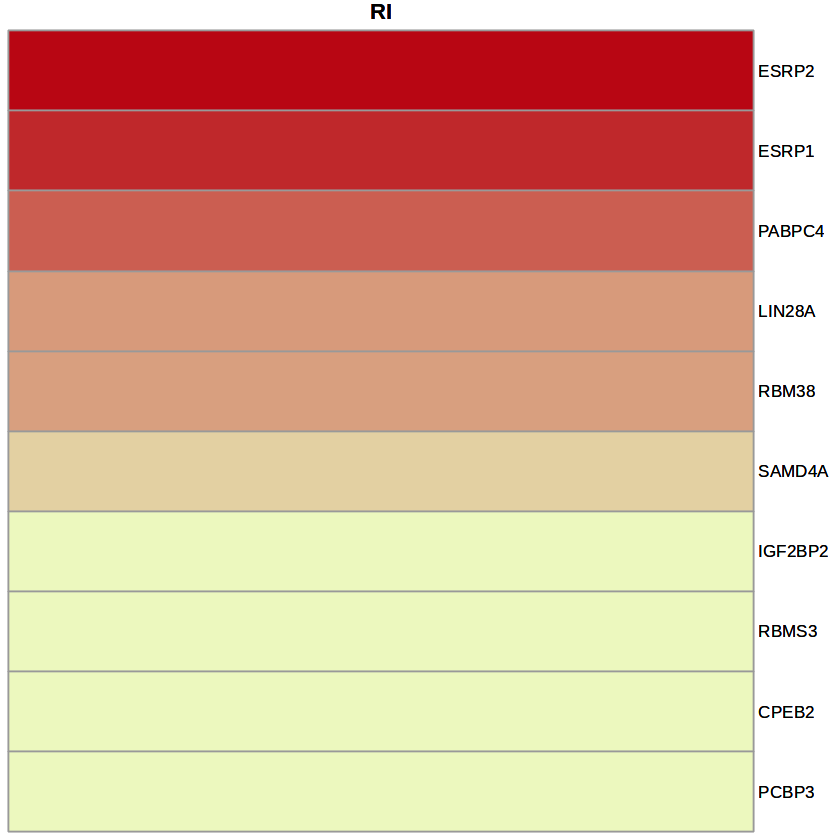

In [16]:
library(pheatmap)
RI_df<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/rmaps/fre_RI.csv",row.names=1)
rownames(RI_df) <- RI_df$Gene
RI_df$Gene <- NULL

p<-pheatmap(as.matrix(RI_df[1:10,,drop=F]) ,cluster_rows = FALSE, cluster_cols = FALSE, 
            color = colorRampPalette(c("#ecf8be", "#b80613"))(50),
            main = "RI",
            fontsize_row = 10,
            show_colnames = F,
            legend = F,
            annotation_legend = F
) 
p


Warning message:
“package ‘gtools’ was built under R version 4.3.2”

Attaching package: ‘gtools’


The following object is masked from ‘package:futile.logger’:

    scat


Warning message:
“Removed 103 rows containing missing values or values outside the scale range
(`geom_point()`).”


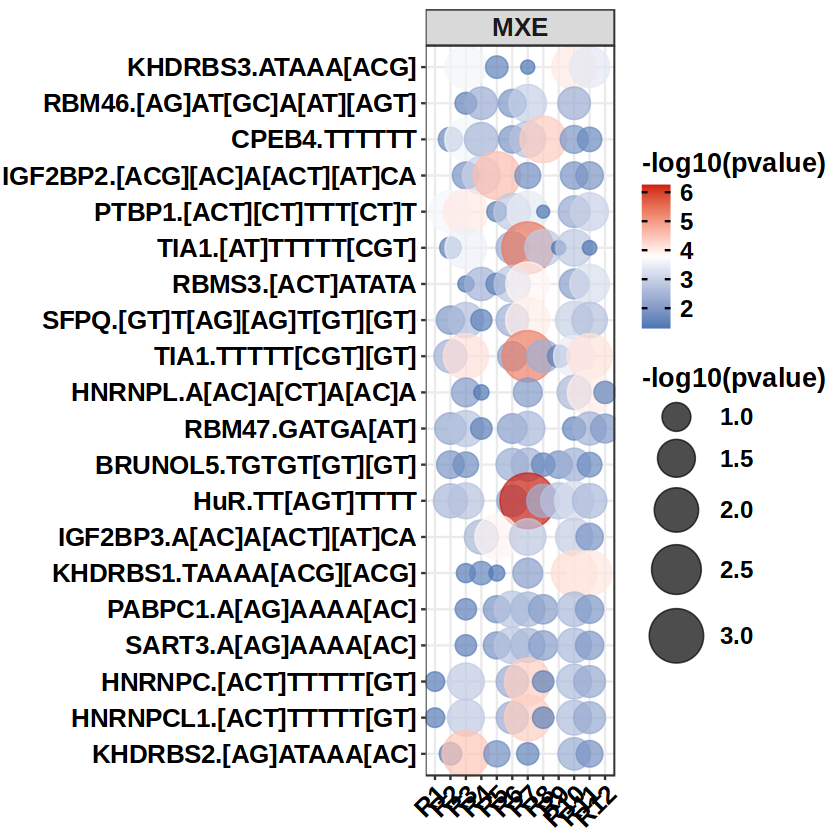

In [30]:
rm(list = ls())
library(gtools)
sorted_by_count<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/rmaps/sorted_by_count.csv")
sorted_by_count <- as.data.frame(lapply(sorted_by_count, as.vector))
df_top20 <- dplyr::slice(sorted_by_count %>% arrange(desc(total_count_non_na)), 1:20)

df_top20$RBP <- factor(df_top20$RBP, levels = df_top20$RBP)

MXE<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/rmaps/MXE_rmaps.csv")

rbp_order <- df_top20$RBP

df1_filtered <- MXE %>%
  dplyr::filter(RBP %in% rbp_order) %>%
  arrange(match(RBP, rbp_order))

df1_filtered <- df1_filtered %>%
  mutate(R = factor(R, levels = mixedsort(unique(R))))


df1_filtered <- df1_filtered %>%
  mutate(RBP = factor(RBP, levels = unique(RBP)))


# 绘制 df_MXE 的气泡图
p_MXE <- ggplot(df1_filtered, aes(x = R, y = RBP, size = log_adj_pval/2, color = log_adj_pval)) +
  geom_point(alpha = 0.7) + 
  scale_size_continuous(range = c(3, 15)) +  # 调整点的大小范围
  scale_color_gradientn(colors = c("#4d76b2", "#ffffff", "#cc1e12")) +
  scale_y_discrete(limits = rev(levels(df1_filtered$RBP))) +  # 反转y轴的显示顺序  # 渐变颜色
  facet_grid(~ AS_type) +  # 使用AS_type进行分面
  theme_bw() +  # 使用黑白主题
  theme(
    strip.text.x = element_text(size = 15, face = "bold"),  # 调整分面标签的字体大小和粗体
    axis.text.x = element_text(angle = 45, hjust = 1,size = 15,color="black",face = "bold"),  # 旋转x轴标签
    axis.text.y = element_text(size = 15,color="black",face = "bold"),
    axis.title.x = element_blank(),  # 去掉x轴标题
    axis.title.y = element_blank(),   # 去掉y轴标题
    legend.text = element_text(size = 14, color="black",face = "bold"),  # 调整图例文字大小和粗体
    legend.title = element_text(size = 16, color="black",face = "bold"),
    legend.ticks = element_line()
  ) + 
  labs(
    size = "-log10(pvalue)",
    color = "-log10(pvalue)"
  )
p_MXE

# Identification and characterization of aging-associated AS-derived neoantigens.(Figure 6)
# (source /Prediction of neoantigens/NeoFilter.R )

Rows: 12585 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): AS_event_ID, AS_type, GeneID, geneSymbol, tranid, CDS_same, dif_cut...
dbl (2): FDR, IncLevelDifference

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


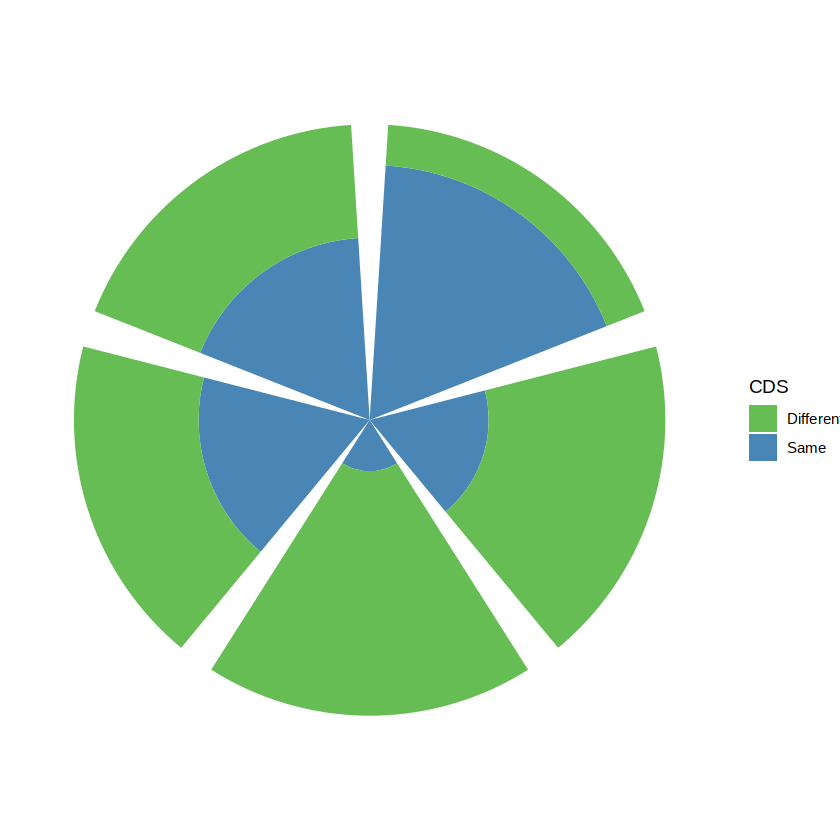

In [41]:
rm(list = ls())
library(readr)
peptied <- read_tsv("/data3/lishuhan/30GSE_health_SRR/v3AS/v2_old_you/file/DASEs_Peptides_anno.csv")

counts <- table(peptied$AS_type, peptied$CDS_same)
counts_df <- as.data.frame(counts)
names(counts_df) <- c("AS_type", "CDS_same", "Frequency")

counts_df$AS_type <- factor(counts_df$AS_type, levels = unique(counts_df$AS_type))

# 按 AS_type 分组计算总频率和归一化频率
df_grouped <- counts_df %>%
  group_by(AS_type, CDS_same) %>%
  summarise(Total_Frequency = sum(Frequency), .groups = 'drop') %>%
  mutate(Normalized_Freq = Total_Frequency / sum(Total_Frequency))

# 转换数据为可以在环形柱状图中使用的格式
df_long <- df_grouped %>%
  arrange(AS_type, desc(CDS_same)) %>%
  mutate(
    Cumsum = cumsum(Normalized_Freq) - Normalized_Freq,
    Fill = if_else(CDS_same == "Same", "Same", "Different")
  )


p <- ggplot(df_long, aes(x = AS_type, y = Normalized_Freq, fill = Fill)) +
  geom_bar(stat = "identity", position = "fill") +
  coord_polar(start = 0) +
  scale_fill_manual(values = c("Same" = "#4986b5", "Different" = "#65bd54"),
                    name = "CDS") +
  theme_void()

p

Warning message:
“package ‘stringr’ was built under R version 4.3.2”
Warning message in geom_text(data = subset(hla_counts, Percentage > 3 | pep_num > :
“Ignoring unknown parameters: `face`”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


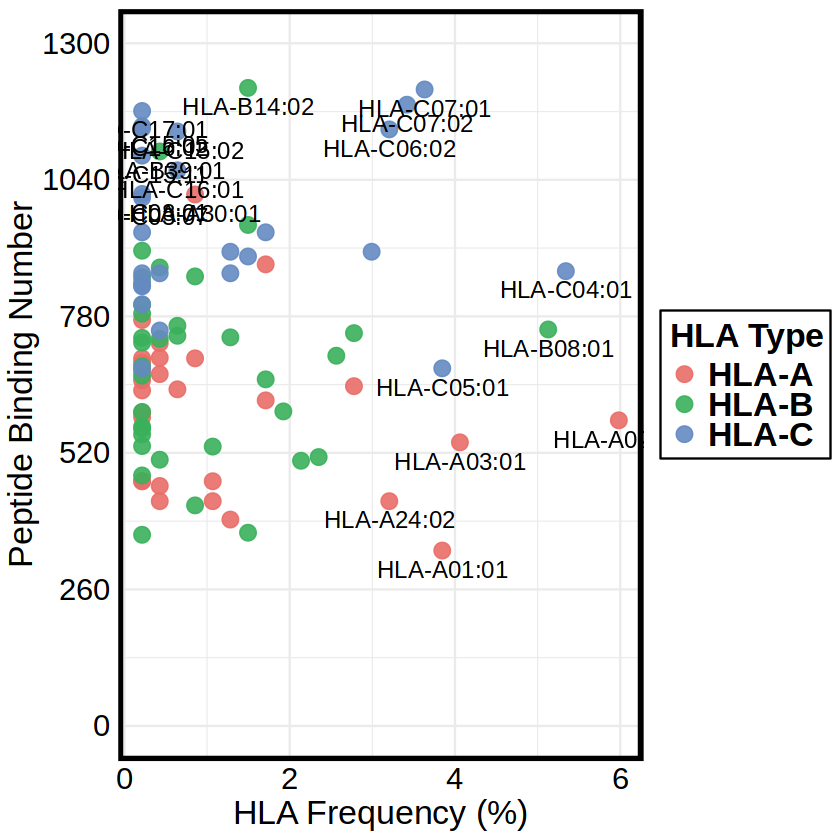

In [43]:
rm(list=ls())
library(stringr)
load(file="/data3/lishuhan/30GSE_health_SRR/v3AS/MHC/noCM_list.RData")

HLA<-read.table("/data3/lishuhan/30GSE_health_SRR/v3AS/MHC/ss3.txt",sep = "\t")

hla_counts <- HLA %>%
  group_by(V1) %>%
  summarise(Count = n())
total_count <- sum(hla_counts$Count)
hla_counts <- hla_counts %>%
  mutate(Percentage = Count / total_count * 100)

pep_num <- sapply(list_net1, nrow)
pep_num_df <- data.frame(V1 = names(pep_num), pep_num = pep_num)
hla_counts <- left_join(hla_counts, pep_num_df, by = "V1")
hla_counts <- hla_counts %>%
  mutate(HLA_type = str_extract(V1, "^HLA-[A-Z]+"))


p <- ggplot(data = hla_counts, aes(x = Percentage, y = pep_num, color = HLA_type)) +
  geom_point(size = 4, alpha = 0.9) +  # 点的大小和透明度
  

  geom_text(data = subset(hla_counts, Percentage > 3| pep_num > 1000), 
            aes(label = V1), vjust = 1.6, color = "black", size = 5,face = "bold") +
  

  scale_color_manual(values = c("HLA-A" = "#e86d67", "HLA-B" = "#3ab05b", "HLA-C" = "#6489c1")) +
  
  # 设置图形的标题和轴标签
  labs(
    x = "HLA Frequency (%)",
    y = "Peptide Binding Number",
    color = "HLA Type") +
  
  # 使用最小化主题，并调整图例位置
  theme_minimal() +
  theme(
    legend.position = "right",
    panel.background = element_blank(),  # 移除灰色背景
    panel.border = element_rect(colour = "black", fill = NA, size = 2),  # 加粗四周边框
    legend.background = element_rect(fill = "white", colour = "black"),  # 图例背景调整
    axis.text = element_text(color = "black", size = 12),  # 调整坐标轴文本
    axis.title = element_text(size = 14)  # 调整坐标轴标题
  )+
  theme(
    axis.text = element_text(size = 18, colour = 'black'),
    axis.title = element_text(size = 20),
    legend.text = element_text(size = 20, colour = 'black', face = "bold"), # 改变图例文字的字体大小
    legend.title = element_text(size = 20, colour = 'black', face = "bold")
  )+
  scale_y_continuous(limits = c(0, 1300), breaks = seq(0, 1300 ,by = 260))
p

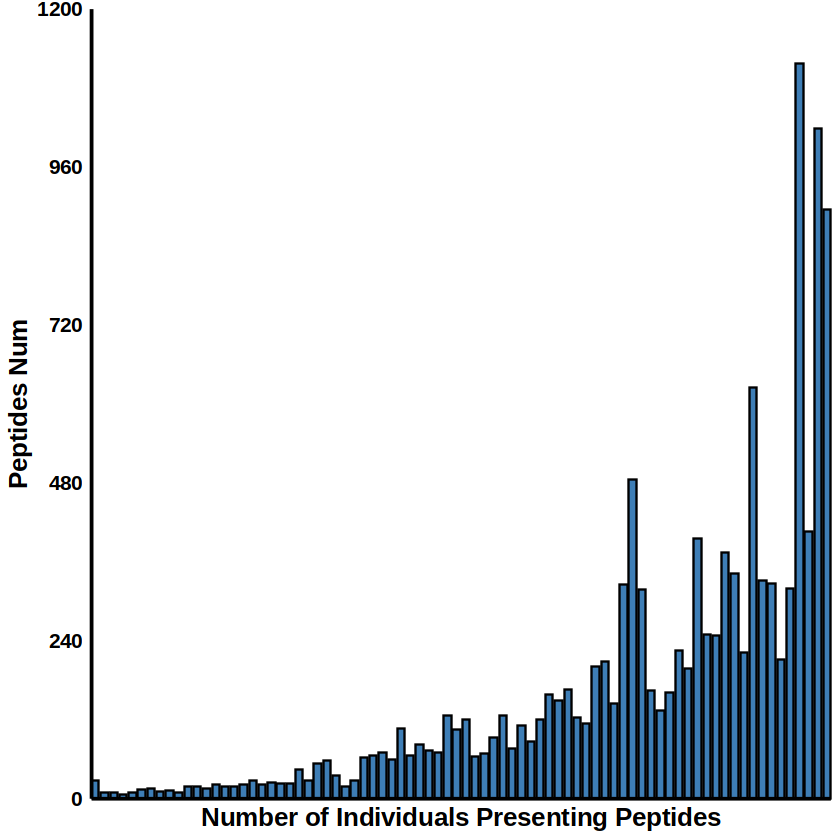

In [48]:
rm(list=ls())
peptide_freq<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/MHC/HLA_old/nocm_peptide_freq.csv")

freq_table <- as.data.frame(table(peptide_freq$n))

colnames(freq_table) <- c("n", "Frequency")

freq_table$n <- as.numeric(as.character(freq_table$n))

p <- ggplot(freq_table, aes(x = n, y = Frequency)) +
  geom_bar(stat = "identity", fill = "#3e7eb6", color = "black", width = 0.8) + # 调整宽度去掉间隔
  scale_x_reverse(breaks = seq(1, 80, by = 1), expand = c(0, 0)) + # 反转x轴并移除间隔
  scale_y_continuous(expand = c(0, 0), limits = c(0, 1200), breaks = seq(0, 1200, by = 240)) + # 移除y轴的空白间隔
  theme_minimal() +
  labs(x = "Number of Individuals Presenting Peptides", y = "Peptides Num") +
  theme(
    axis.text.x = element_blank(), # 隐藏横坐标的标签
    axis.ticks.x = element_blank(), # 隐藏横坐标的刻度线
    axis.text.y = element_text(size = 12, face = "bold", color = "black"),
    axis.title.x = element_text(size = 15, face = "bold", color = "black"),
    axis.title.y = element_text(size = 15, face = "bold", color = "black"),
    panel.grid.major = element_blank(), # 移除主网格线
    panel.grid.minor = element_blank(), # 移除次网格线
    panel.background = element_blank(),  # 移除背景
    axis.line = element_line(size = 0.8, color = "black") # 加粗坐标轴线
  )

# 移除 geom_text
# geom_text(aes(label = Frequency), vjust = -0.5, size = 3, color = "black", face = "bold", check_overlap = TRUE) 

p


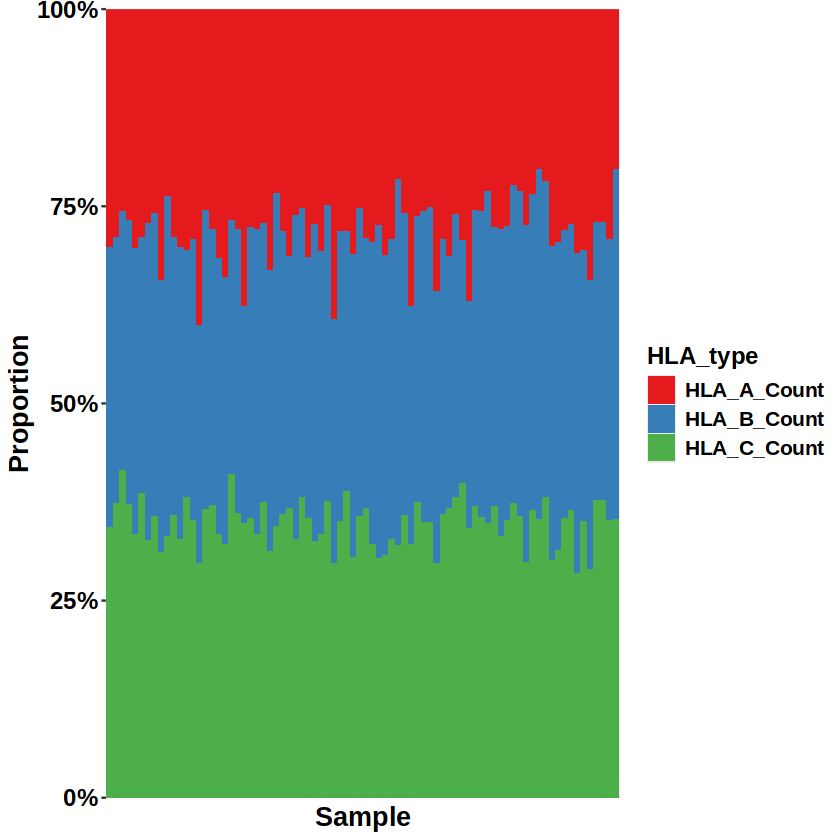

In [47]:
rm(list=ls())
HLA_old1<-read.csv("/data3/lishuhan/30GSE_health_SRR/v3AS/MHC/HLA_old/cm_final.csv")
df_long <- HLA_old1 %>%
  gather(key = "HLA_type", value = "Count", HLA_A_Count:HLA_C_Count)
df_long$name<-factor(df_long$sample,levels = paste0("old",c(1:80)))

df_long <- df_long %>%
  group_by(name) %>%
  mutate(total_count = sum(Count)) %>%
  ungroup()

# 计算每个HLA_type占比
df_long <- df_long %>%
  mutate(percentage = Count / total_count)

# 绘制堆叠图，Y轴用占比来表示
colors <- c("HLA_A_Count" = "#E41A1C", "HLA_B_Count" = "#377EB8", "HLA_C_Count" = "#4DAF4A")

p <- ggplot(df_long, aes(x = name, y = percentage, fill = HLA_type)) +
  geom_bar(stat = "identity", position = "stack") +
  theme(axis.text.x = element_blank(),  # 隐藏横坐标的标签
        axis.ticks.x = element_blank()) +  # 隐藏横坐标的刻度
  labs(x = "Sample", y = "Proportion", fill = "HLA_type") +
  scale_fill_manual(values = colors) +
  theme(
    plot.background = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size = 14, face = "bold", color = "black"),
    axis.title = element_text(size = 16, face = "bold", color = "black"),
    legend.title = element_text(size = 14, face = "bold", color = "black"),
    legend.text = element_text(size = 12, face = "bold", color = "black")
  ) +
  scale_y_continuous(expand = c(0, 0), labels = scales::percent)

p